In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/contract_awards_in_investment_project_financing_09-10-2024.csv')
df.head()

,As of Date,Fiscal Year,Region,Borrower Country / Economy,Borrower Country / Economy Code,Project ID,Project Name,Project Global Practice,Procurement Category,Procurement Method,WB Contract Number,Contract Description,Borrower Contract Reference Number,Contract Signing Date,Supplier ID,Supplier,Supplier Country / Economy,Supplier Country / Economy Code,Supplier Contract Amount (USD),Review type
0,10/09/2024 00:00:00,2017,SOUTH ASIA,Afghanistan,AF,P120397,Afghanistan Agricultural Inputs Project (AAIP),"Agriculture, Fishing and Forestry;Industry, Tr...",Consultant Services,Individual Consultant Selection,1318576,Legal Specialst for Quarantine,MAIL/WB/IAIDS/IC/012,11/01/2016 00:00:00,192025.0,MR. LUTFULLAH SADAT,Afghanistan,AF,27006.76,Prior
1,10/09/2024 00:00:00,2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P133226,Lebanon Fiscal Management Reform 2,Public Administration,Consultant Services,Individual Consultant Selection,1517913,Signed Contract relative to the PMU Positions ...,2,11/30/2016 00:00:00,173999.0,MARWAN TAMIM (MR.),Lebanon,LB,151200.00,Prior
2,10/09/2024 00:00:00,2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P133226,Lebanon Fiscal Management Reform 2,Public Administration,Consultant Services,Individual Consultant Selection,1517959,Title on Consulting services as International ...,4,11/02/2016 00:00:00,166247.0,MOUNIR RACHED,Lebanon,LB,312000.00,Prior
3,10/09/2024 00:00:00,2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P149242,Emergency National Poverty Targeting Program P...,Social Protection,Consultant Services,Direct Selection,1524264,Procurement Assistant - FOT,C-IC036,09/07/2016 00:00:00,178397.0,JESSY EL KHOURY,Lebanon,LB,76800.00,Prior
4,10/09/2024 00:00:00,2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P149242,Emergency National Poverty Targeting Program P...,Social Protection,Consultant Services,Direct Selection,1524268,Procurement Specialist - FOT,C-IC035,09/07/2016 00:00:00,133992.0,NATHALIE GEBRAYEL,Lebanon,LB,195200.00,Prior


In [207]:

grouped_df = df.groupby(by = ['Project ID', 'WB Contract Number'])['Supplier Contract Amount (USD)'].sum().reset_index()
display(grouped_df)

,Project ID,WB Contract Number,Supplier Contract Amount (USD)
0,P050529,1540714,97000.00
1,P050529,1541294,80236.13
2,P050529,1541332,79969.00
3,P055120,1545554,901914.00
4,P064836,1545100,4293699.78
...,...,...,...
242435,P507066,1793773,48051.81
242436,P507066,1794892,14257.30
242437,P507066,1795803,1221688.96
242438,P507066,1796335,469908.62


Top borrowing/supplying countries
Trends spending by region/country/

In [4]:
new_rows = []
for index, row in df.iterrows():
    if ';' not in str(row['Project Global Practice']):
        new_rows.append(row)
        continue
    practices = str(row['Project Global Practice']).split(';')
    for practice in practices:
        new_row = row.copy()
        new_row['Project Global Practice'] = practice.strip()
        new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)

In [5]:
new_df['Project Global Practice'].value_counts().head(20)

Project Global Practice
Agriculture, Fishing and Forestry              97805
Public Administration                          63206
Industry, Trade and Services                   57381
Social Protection                              45651
Water, Sanitation and Waste Management         42964
Education                                      39624
Transportation                                 35993
Health                                         35544
Information and Communications Technologies    31531
Energy and Extractives                         18119
Financial Sector                                6644
Name: count, dtype: int64

In [210]:
new_df.columns

Index(['As of Date', 'Fiscal Year', 'Region', 'Borrower Country / Economy',
       'Borrower Country / Economy Code', 'Project ID', 'Project Name',
       'Project Global Practice', 'Procurement Category', 'Procurement Method',
       'WB Contract Number', 'Contract Description',
       'Borrower Contract Reference Number', 'Contract Signing Date',
       'Supplier ID', 'Supplier', 'Supplier Country / Economy',
       'Supplier Country / Economy Code', 'Supplier Contract Amount (USD)',
       'Review type'],
      dtype='object')

In [44]:
df_procurement =df[['As of Date', 'Fiscal Year','Borrower Country / Economy','Project Global Practice','Procurement Category','Supplier','Supplier Contract Amount (USD)']]
df_procurement.head(50)

,As of Date,Fiscal Year,Borrower Country / Economy,Project Global Practice,Procurement Category,Supplier,Supplier Contract Amount (USD)
0,10/09/2024 00:00:00,2017,Afghanistan,"Agriculture, Fishing and Forestry;Industry, Tr...",Consultant Services,MR. LUTFULLAH SADAT,2.700676e+04
1,10/09/2024 00:00:00,2017,Lebanon,Public Administration,Consultant Services,MARWAN TAMIM (MR.),1.512000e+05
2,10/09/2024 00:00:00,2017,Lebanon,Public Administration,Consultant Services,MOUNIR RACHED,3.120000e+05
3,10/09/2024 00:00:00,2017,Lebanon,Social Protection,Consultant Services,JESSY EL KHOURY,7.680000e+04
4,10/09/2024 00:00:00,2017,Lebanon,Social Protection,Consultant Services,NATHALIE GEBRAYEL,1.952000e+05
5,10/09/2024 00:00:00,2017,Lebanon,Public Administration,Consultant Services,MIKE WILLIAMS,1.417686e+05
6,10/09/2024 00:00:00,2017,India,Social Protection,Consultant Services,JPS ASSOCIATES,4.306824e+04
7,10/09/2024 00:00:00,2017,Nicaragua,Health,Non-consulting Services,WILLIAM JOSE TINOCO GONZALEZ,1.560000e+04
8,10/09/2024 00:00:00,2017,India,Transportation,Civil Works,MONTECARLO LIMITED,4.222775e+07
9,10/09/2024 00:00:00,2017,India,Transportation,Civil Works,BACKBONE ENTERPRISES LIMITED,4.222775e+07


In [61]:
df_top_borrowing = df_procurement.groupby('Borrower Country / Economy')["Supplier Contract Amount (USD)"].sum()


<Axes: xlabel='Borrower Country / Economy'>

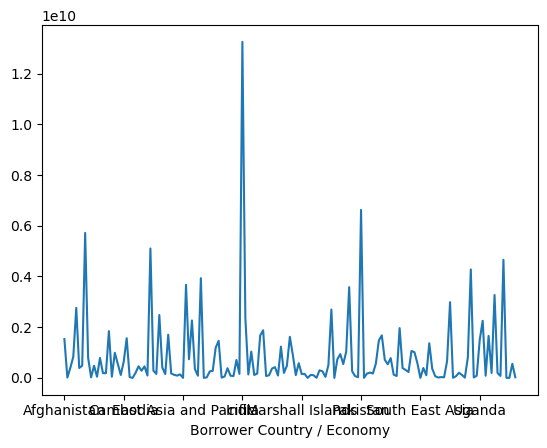

In [62]:
# Sort the DataFrame in ascending order
df_top_borrowing.plot()

In [214]:
grouped_df = df.groupby("Borrower Country / Economy")["Supplier Contract Amount (USD)"].sum().reset_index()
grouped_df


,Borrower Country / Economy,Supplier Contract Amount (USD)
0,Afghanistan,1.532588e+09
1,Africa,1.242595e+07
2,Albania,3.956975e+08
3,Angola,8.386034e+08
4,Argentina,2.763313e+09
...,...,...
148,Western and Central Africa,4.659929e+09
149,World,4.286469e+06
150,"Yemen, Republic of",6.661016e+05
151,Zambia,5.569871e+08


In [215]:
# Sort the DataFrame by the total amount in descending order and select top 5
top_borrowing_countries = grouped_df.sort_values(by="Supplier Contract Amount (USD)", ascending=False).head(5)
top_borrowing_countries


,Borrower Country / Economy,Supplier Contract Amount (USD)
60,India,1.325133e+10
100,Pakistan,6.626606e+09
7,Bangladesh,5.718827e+09
29,China,5.105185e+09
148,Western and Central Africa,4.659929e+09


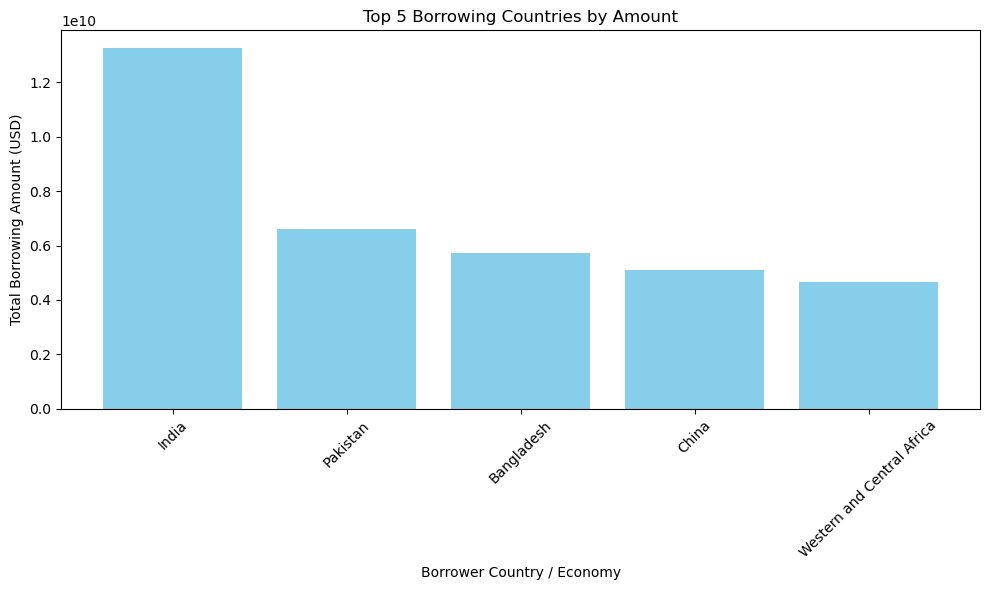

In [216]:

plt.figure(figsize=(10, 6))
plt.bar(top_borrowing_countries["Borrower Country / Economy"], top_borrowing_countries["Supplier Contract Amount (USD)"], color='skyblue')
plt.xlabel("Borrower Country / Economy")
plt.ylabel("Total Borrowing Amount (USD)")
plt.title("Top 5 Borrowing Countries by Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [218]:
df_country = df.groupby(["Borrower Country / Economy", "Procurement Category"])["Supplier Contract Amount (USD)"].sum().reset_index()

# Find the highest borrowing country for each procurement category
top_borrowers = df_country.loc[df_country.groupby("Procurement Category")["Supplier Contract Amount (USD)"].idxmax()]
top_borrowers


,Borrower Country / Economy,Procurement Category,Supplier Contract Amount (USD)
228,India,Civil Works,1.085950e+10
121,"Congo, Democratic Republic of",Consultant Services,1.079353e+09
519,Turkiye,Goods,2.571039e+09
235,Indonesia,Non-consulting Services,6.416359e+08


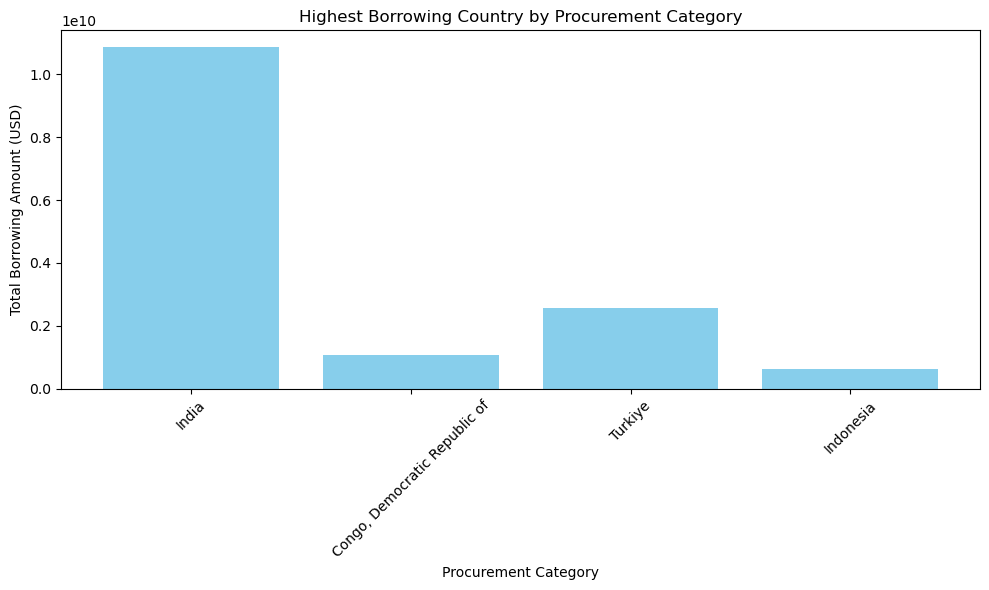

In [219]:
# Plot of top most country borrowing by procurement category
plt.figure(figsize=(10, 6))
plt.bar(top_borrowers["Borrower Country / Economy"], top_borrowers["Supplier Contract Amount (USD)"], color='skyblue')
plt.xlabel("Procurement Category")
plt.ylabel("Total Borrowing Amount (USD)")
plt.title("Highest Borrowing Country by Procurement Category")
plt.xticks(rotation=45)
highest_borrowig_countries = plt.tight_layout()
plt.savefig("highest borrowing country.png")
highest_borrowig_countries = plt.show()



In [234]:
df_indexed = df[['Fiscal Year','Borrower Country / Economy', 'Supplier Contract Amount (USD)']]
df_indexed
df_indexed = df_indexed.rename(columns = {'Fiscal Year':'Year','Borrower Country / Economy':'Country', 'Supplier Contract Amount (USD)':'Spending Amount'})
df_indexed

,Year,Country,Spending Amount
0,2017,Afghanistan,27006.76
1,2017,Lebanon,151200.00
2,2017,Lebanon,312000.00
3,2017,Lebanon,76800.00
4,2017,Lebanon,195200.00
...,...,...,...
250989,2022,Colombia,37955.06
250990,2024,Honduras,17600.00
250991,2024,Honduras,20000.00
250992,2025,Kiribati,68564.34


In [283]:
#total spending for each country per year
df_indexed = df_indexed.groupby(['Year', 'Country'])['Spending Amount'].sum().reset_index()
df_indexed = df_indexed.sort_values('Spending Amount', ascending=False)
df_indexed = df_indexed.reset_index(drop=True)
df_indexed

,Year,Country,Spending Amount
0,2020,India,2.775981e+09
1,2018,India,2.391383e+09
2,2017,Pakistan,2.385052e+09
3,2017,India,2.324988e+09
4,2021,India,1.933108e+09
...,...,...,...
1238,2024,Chile,3.226670e+03
1239,2025,Kosovo,2.888660e+03
1240,2025,East Asia and Pacific,1.500000e+03
1241,2020,Fiji,3.094100e+02


In [344]:
#highest spending country
df_highest_country= df_indexed.groupby('Country')['Spending Amount'].sum()


In [345]:
df_highest_country = df_highest_country.reset_index()

In [346]:
# 
df_highest_country = df_highest_country.sort_values('Spending Amount', ascending=False)
df_highest_country = df_highest_country.reset_index(drop=True)
df_highest_country

,Country,Spending Amount
0,India,1.325133e+10
1,Pakistan,6.626606e+09
2,Bangladesh,5.718827e+09
3,China,5.105185e+09
4,Western and Central Africa,4.659929e+09
...,...,...
148,"Yemen, Republic of",6.661016e+05
149,Mauritius,3.701123e+05
150,Multi-Regional,2.580197e+05
151,South East Asia,1.243479e+05


In [ ]:
# plt.figure(figsize=(10, 6))
# plt.bar(df_highest_country['Country'], df_highest_country['Spending Amount'], color='pink')
# plt.title('Top 10 Countries by Highest Spending Amount')
# plt.xlabel('Country')
# plt.ylabel('Spending Amount (USD)')
# plt.xticks(rotation=30)
# plt.grid(axis='y')

# # Show the plot
# plt.tight_layout()
# plt.show()

In [347]:
df_highest_country.set_index('Country',inplace=True)


<Axes: xlabel='Country'>

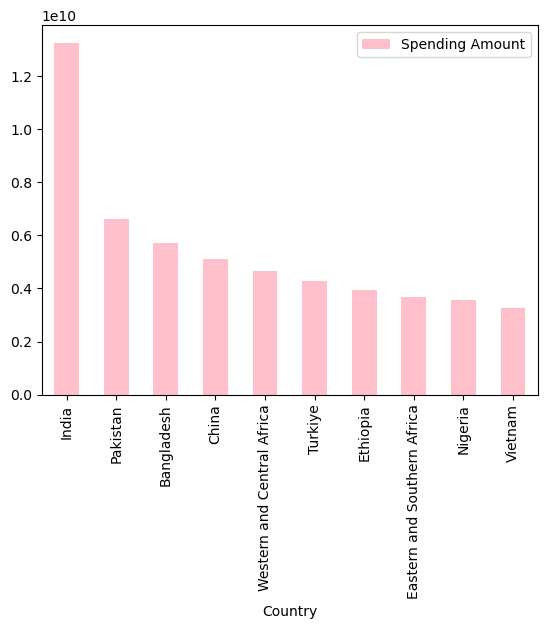

In [348]:
#bar chart for top 10 highest spending countries
df_highest_country.iloc[:10,:].plot(kind='bar', color='pink')